In [2]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random
import seaborn as sns
sns.set_theme()

# 2.2

In [4]:
def transition(x, y):
    if x<0:
        u, v = transition(-x, y)
        return (-u, v)
    if y<0:
        u, v = transition(x, -y)
        return (u, -v)
    if x<5 and y<5:
        alea = random.random()
        if alea < 1/4:
            return (x-1, y)
        elif alea < 1/2:
            return (x+1, y)
        elif alea < 3/4:
            return (x, y-1)
        else:
            return (x, y+1)
    if x==5 and y<5:
        alea = random.random()
        if alea < 1/3:
            return (x-1, y)
        elif alea < 2/3:
            return (x, y-1)
        else:
            return (x, y+1)
    if x<5 and y==5:
        u, v = transition(y, x)
        return (v, u)
    if x==5 and y==5:
        if random.random() < 1/2:
            return (4, 5)
        else:
            return (5, 4)

In [12]:
[transition(0, 0) for _ in range(10)]

[(0, 1),
 (0, 1),
 (1, 0),
 (0, -1),
 (-1, 0),
 (0, 1),
 (0, 1),
 (0, -1),
 (0, -1),
 (1, 0)]

In [10]:
[transition(0, 5) for _ in range(10)]

[(0, 4),
 (1, 5),
 (1, 5),
 (0, 4),
 (-1, 5),
 (-1, 5),
 (-1, 5),
 (1, 5),
 (-1, 5),
 (0, 4)]

In [11]:
[transition(5, 5) for _ in range(10)]

[(4, 5),
 (4, 5),
 (4, 5),
 (5, 4),
 (4, 5),
 (4, 5),
 (5, 4),
 (5, 4),
 (4, 5),
 (4, 5)]

# 2.3

In [13]:
def marche(x, y, n):
    res = []
    state = (x,y)
    for i in range(n):
        state = transition(*state)
        res.append(state)
    return res

In [14]:
marche(0, 0, 20)

[(1, 0),
 (0, 0),
 (0, -1),
 (0, 0),
 (0, -1),
 (1, -1),
 (1, 0),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 1),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (3, 3),
 (2, 3),
 (1, 3)]

# 2.4

In [30]:
def dessiner_marche(x, y, n):
    fig, ax = plt.subplots(figsize=(7,7))
    res = [(0,0)] + marche(x, y, n)
    ax.plot([p[0] for p in res], [p[1] for p in res])
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xticks(range(-5,6))
    ax.set_yticks(range(-5,6))
    ax.set_title(f"Marche aléatoire issue de {x,y} ({n} premiers pas)")
    ax.set_aspect(1)
    ax.add_patch(plt.Circle((res[-1][0], res[-1][1]), 0.1))
    plt.show()

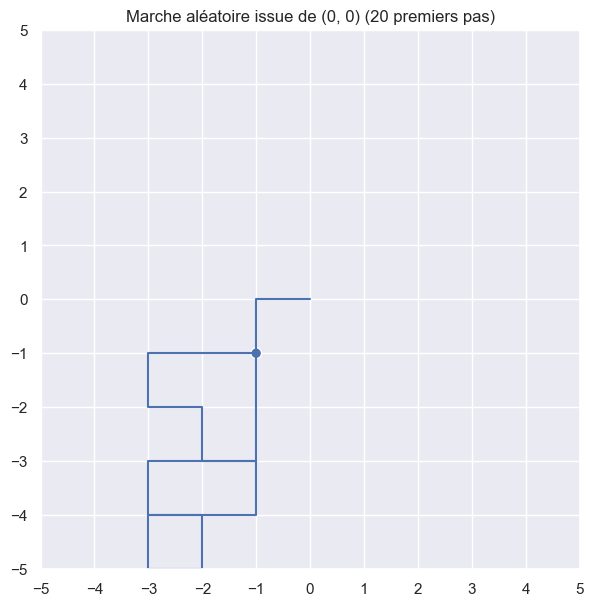

In [31]:
dessiner_marche(0, 0, 20)

# 2.5

In [32]:
def temps_atteinte():
    res = 0
    state = (0, 0)
    while max(state[0], -state[0], state[1], -state[1])<5:
        state = transition(*state)
        res += 1
    return res

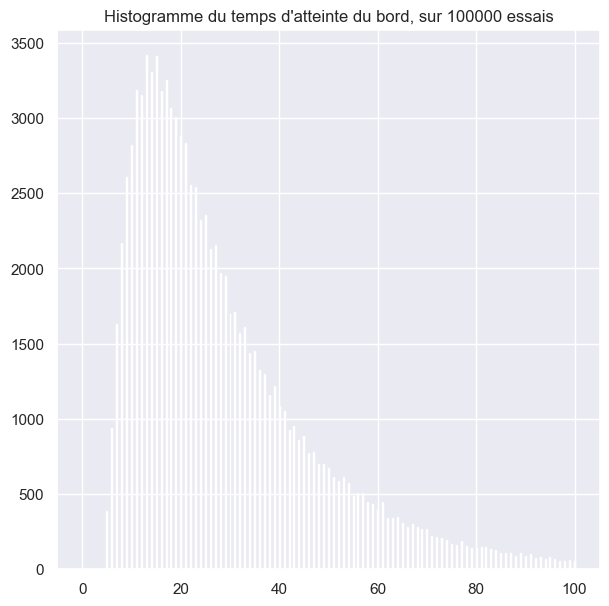

In [47]:
L = [temps_atteinte() for _ in range(100000)]
fig, ax = plt.subplots(figsize=(7,7))
frequences = [L.count(i) for i in range(101)]
ax.bar(range(101), frequences, width=0.2, align="center")
ax.set_title("Histogramme du temps d'atteinte du bord, sur 100000 essais")
plt.show()

# 2.6

In [40]:
def frequence(x, y, n):
    res = marche(0, 0, n)
    return res.count((x,y))/n

In [41]:
2/440, 3/440, 4/440

(0.004545454545454545, 0.006818181818181818, 0.00909090909090909)

In [44]:
frequence(0, 0, 1000000)

0.008981

In [45]:
frequence(0, 5, 1000000)

0.007045

In [46]:
frequence(5, 5, 1000000)

0.004586